# 🚀 Setup del Proyecto y Carga de Datos

**Proyecto:** Sistema de Análisis de Sentimiento - Amazon Reviews  
**Curso:** Data Science III - NLP & Deep Learning  
**Autor:** Miguel  
**Fecha:** Enero 2026

---

## Objetivos de este Notebook

1. ✅ Configurar el ambiente de trabajo
2. ✅ Instalar y verificar librerías necesarias
3. ✅ Cargar el dataset de Amazon Reviews
4. ✅ Exploración inicial de los datos
5. ✅ Conversión a clasificación binaria
6. ✅ Guardar datos limpios

---

## 1. Instalación de Librerías

Primero verificamos que todas las librerías estén instaladas.

In [1]:
# Verificar versión de Python
import sys
print(f"Python version: {sys.version}")
print(f"Python executable: {sys.executable}")

Python version: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
Python executable: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\venv\Scripts\python.exe


## 2. Imports Principales

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# System
import os
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Agregar carpeta src al path
sys.path.append('../')  # Agregar directorio raíz

# Imports locales
from config import *
from src.data_loader import *

print("✅ Imports completados exitosamente")

✅ Imports completados exitosamente


In [3]:
# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Configuración de visualización lista")

✅ Configuración de visualización lista


## 3. Verificación de Estructura del Proyecto

In [4]:
# Verificar directorios
print("📁 Estructura del proyecto:")
print(f"   Base: {BASE_DIR}")
print(f"   Data: {DATA_DIR}")
print(f"   Raw Data: {RAW_DATA_DIR}")
print(f"   Processed Data: {PROCESSED_DATA_DIR}")
print(f"   Models: {MODELS_DIR}")
print(f"   Reports: {REPORTS_DIR}")

# Crear directorios si no existen
create_directories()

📁 Estructura del proyecto:
   Base: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..
   Data: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..\data
   Raw Data: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..\data\raw
   Processed Data: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..\data\processed
   Models: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..\models
   Reports: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..\reports
✅ Directorio creado/verificado: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..\data
✅ Directorio creado/verificado: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..\data\raw
✅ Directorio creado/verificado: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..\data\processed
✅ Directorio creado/verificado: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\no

## 4. Carga del Dataset

In [5]:
# Verificar que el archivo existe
print(f"📂 Buscando dataset en: {DATASET_PATH}")
print(f"   Existe: {DATASET_PATH.exists()}")

if not DATASET_PATH.exists():
    print("\n⚠️ IMPORTANTE: Dataset no encontrado!")
    print(f"   Por favor, coloca el archivo 'Reviews.csv' en: {RAW_DATA_DIR}")
else:
    size_mb = DATASET_PATH.stat().st_size / (1024**2)
    print(f"   Tamaño: {size_mb:.2f} MB")

📂 Buscando dataset en: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..\data\raw\Reviews.csv
   Existe: True
   Tamaño: 286.97 MB


In [6]:
# Cargar dataset completo
# NOTA: Si tu PC tiene problemas de memoria, usa sample_size=50000
df = load_raw_data(sample_size=None)  # Cargar todo el dataset

print(f"\n✅ Dataset cargado exitosamente: {df.shape}")

📂 Cargando dataset...
✅ Dataset cargado: 568,454 filas, 10 columnas

✅ Dataset cargado exitosamente: (568454, 10)


## 5. Exploración Inicial

In [7]:
# Primeras filas
print("📋 Primeras 5 filas del dataset:")
df.head()

📋 Primeras 5 filas del dataset:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
# Información del dataset
print_dataset_info(df)


📊 INFORMACIÓN DEL DATASET

🔢 Dimensiones: 568,454 filas × 10 columnas
💾 Memoria: 447.17 MB
🔄 Duplicados: 0

📋 Columnas:
   - Id                   | int64      | Missing:      0 ( 0.00%)
   - ProductId            | object     | Missing:      0 ( 0.00%)
   - UserId               | object     | Missing:      0 ( 0.00%)
   - ProfileName          | object     | Missing:     26 ( 0.00%)
   - HelpfulnessNumerator | int64      | Missing:      0 ( 0.00%)
   - HelpfulnessDenominator | int64      | Missing:      0 ( 0.00%)
   - Score                | int64      | Missing:      0 ( 0.00%)
   - Time                 | int64      | Missing:      0 ( 0.00%)
   - Summary              | object     | Missing:     27 ( 0.00%)
   - Text                 | object     | Missing:      0 ( 0.00%)



In [9]:
# Descripción estadística
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.00,568454.00,568454.00,568454.00,568454.00
mean,284227.50,1.74,2.23,4.18,1296256604.90
std,164098.68,7.64,8.29,1.31,48043312.33
min,1.00,0.00,0.00,1.00,939340800.00
25%,142114.25,0.00,0.00,4.00,1271289600.00
50%,284227.50,0.00,1.00,5.00,1311120000.00
75%,426340.75,2.00,2.00,5.00,1332720000.00
max,568454.00,866.00,923.00,5.00,1351209600.00


## 6. Análisis de la Variable Objetivo (Score)

In [10]:
# Distribución de scores
print("📊 Distribución de Scores:")
score_dist = df['Score'].value_counts().sort_index()
print(score_dist)
print(f"\nTotal: {score_dist.sum():,}")

📊 Distribución de Scores:
Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: count, dtype: int64

Total: 568,454


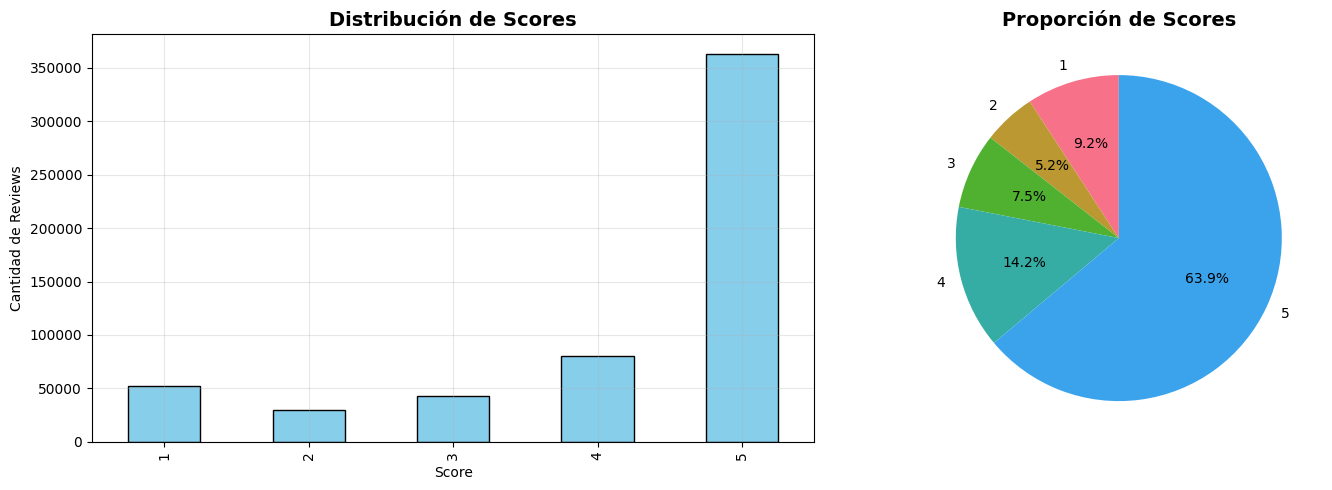


📌 Observación: La mayoría de reviews son positivos (4-5 estrellas)


In [11]:
# Visualizar distribución
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras
score_dist.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribución de Scores', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Cantidad de Reviews')
axes[0].grid(True, alpha=0.3)

# Gráfico de torta
score_dist.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Proporción de Scores', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("\n📌 Observación: La mayoría de reviews son positivos (4-5 estrellas)")

## 7. Conversión a Clasificación Binaria

In [12]:
# Convertir scores a sentimiento binario
df = convert_to_binary_sentiment(df)

print("\n✅ Conversión completada")
print(f"   Dataset final: {df.shape}")


🎯 Convirtiendo scores a sentimiento binario...
✅ Conversión completada:
   - Reviews positivos (Score 4-5): 443,777
   - Reviews negativos (Score 1-2): 82,037
   - Neutrales eliminados (Score 3): 42,640
   - Total final: 525,814

✅ Conversión completada
   Dataset final: (525814, 11)


In [13]:
# Distribución del sentimiento
print("📊 Distribución de Sentimiento:")
sentiment_dist = df['Sentiment'].value_counts()
print(sentiment_dist)
print(f"\nPositivos: {sentiment_dist[1]:,} ({sentiment_dist[1]/len(df)*100:.2f}%)")
print(f"Negativos: {sentiment_dist[0]:,} ({sentiment_dist[0]/len(df)*100:.2f}%)")

📊 Distribución de Sentimiento:
Sentiment
1    443777
0     82037
Name: count, dtype: int64

Positivos: 443,777 (84.40%)
Negativos: 82,037 (15.60%)


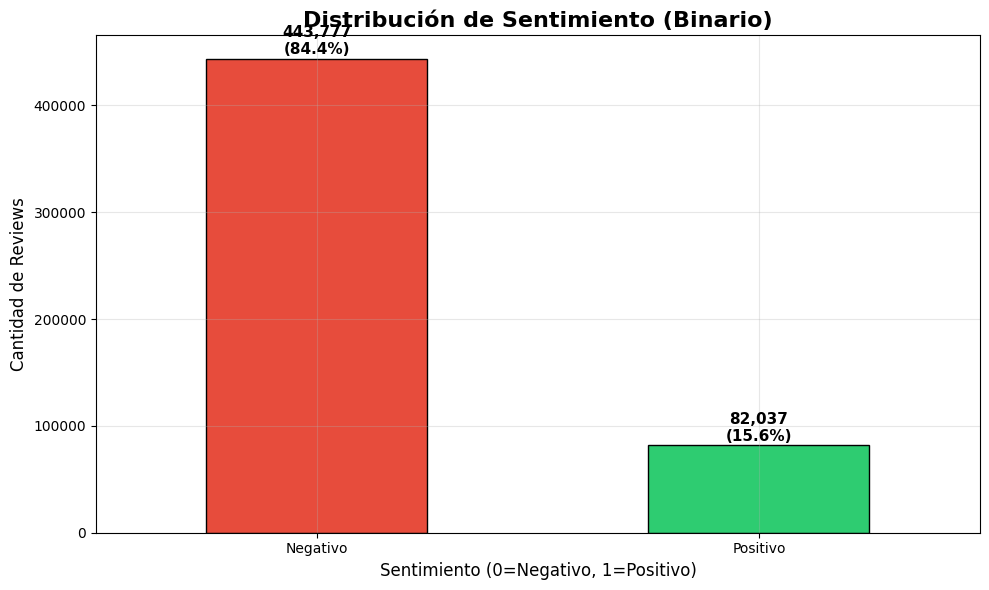

In [14]:
# Visualizar distribución binaria
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#e74c3c', '#2ecc71']  # Rojo para negativo, verde para positivo
sentiment_dist.plot(kind='bar', ax=ax, color=colors, edgecolor='black')
ax.set_title('Distribución de Sentimiento (Binario)', fontsize=16, fontweight='bold')
ax.set_xlabel('Sentimiento (0=Negativo, 1=Positivo)', fontsize=12)
ax.set_ylabel('Cantidad de Reviews', fontsize=12)
ax.set_xticklabels(['Negativo', 'Positivo'], rotation=0)
ax.grid(True, alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(sentiment_dist):
    ax.text(i, v + 1000, f"{v:,}\n({v/len(df)*100:.1f}%)", 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## 8. Análisis de Longitud de Textos

In [15]:
# Calcular longitud de textos
df['Text_Length'] = df['Text'].str.len()
df['Word_Count'] = df['Text'].str.split().str.len()

print("📏 Estadísticas de longitud de textos:")
print("\nCaracteres:")
print(df['Text_Length'].describe())
print("\nPalabras:")
print(df['Word_Count'].describe())

📏 Estadísticas de longitud de textos:

Caracteres:
count   525814.00
mean       429.40
std        439.17
min         12.00
25%        177.00
50%        296.00
75%        517.00
max      16952.00
Name: Text_Length, dtype: float64

Palabras:
count   525814.00
mean        79.02
std         78.45
min          3.00
25%         33.00
50%         55.00
75%         96.00
max       2520.00
Name: Word_Count, dtype: float64


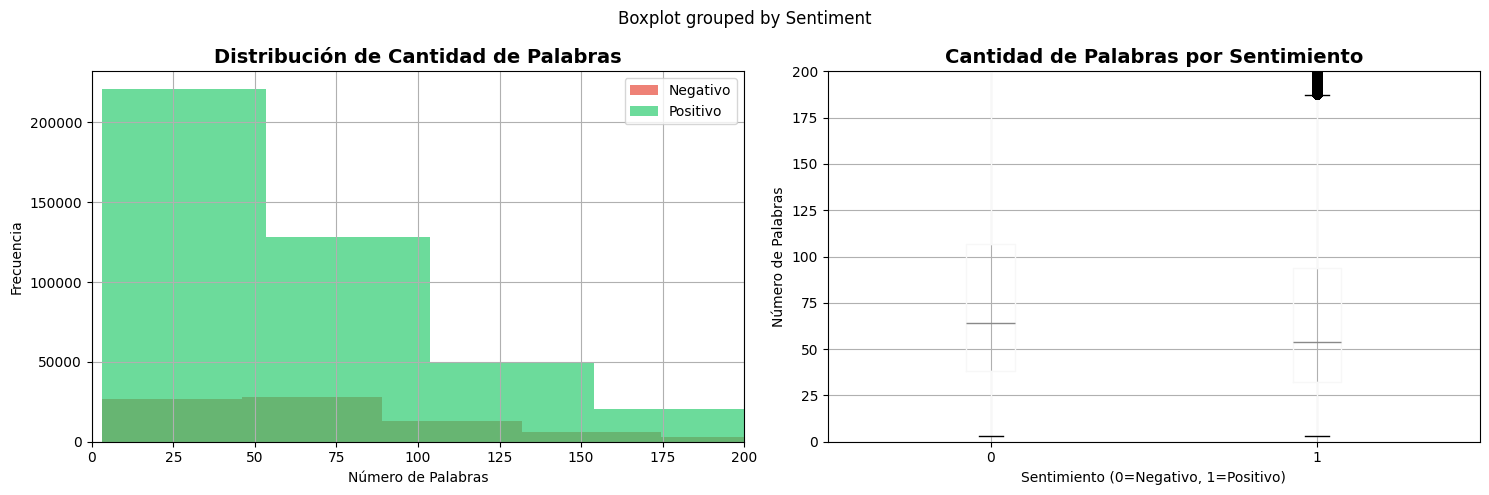

In [16]:
# Comparar longitud por sentimiento
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma de palabras
df[df['Sentiment']==0]['Word_Count'].hist(bins=50, ax=axes[0], alpha=0.7, 
                                            label='Negativo', color='#e74c3c')
df[df['Sentiment']==1]['Word_Count'].hist(bins=50, ax=axes[0], alpha=0.7, 
                                            label='Positivo', color='#2ecc71')
axes[0].set_title('Distribución de Cantidad de Palabras', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Número de Palabras')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].set_xlim(0, 200)

# Boxplot de palabras
df.boxplot(column='Word_Count', by='Sentiment', ax=axes[1])
axes[1].set_title('Cantidad de Palabras por Sentimiento', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentimiento (0=Negativo, 1=Positivo)')
axes[1].set_ylabel('Número de Palabras')
axes[1].set_ylim(0, 200)

plt.tight_layout()
plt.show()

## 9. Muestra de Reviews por Sentimiento

In [17]:
# Ejemplos de reviews positivos
print("✅ EJEMPLOS DE REVIEWS POSITIVOS:")
print("="*80)
positive_samples = df[df['Sentiment']==1].sample(3, random_state=42)
for idx, row in positive_samples.iterrows():
    print(f"\nScore: {row['Score']} | Palabras: {row['Word_Count']}")
    print(f"Summary: {row['Summary']}")
    print(f"Text: {row['Text'][:200]}...")
    print("-"*80)

✅ EJEMPLOS DE REVIEWS POSITIVOS:

Score: 5 | Palabras: 95
Summary: Classic by Gano
Text: I have started every morning for the last 7 months with a cup of Ganocafe Classic coffee. In my opinion it must be providing some benefits, I haven't had even one cold or any flu in that time. At age ...
--------------------------------------------------------------------------------

Score: 5 | Palabras: 71
Summary: Appropriate for myriads of dishes!
Text: Thank goodness this pasta makes life for a gluten-free lifestyle so much more enjoyable.  It cooks with enough firm texture, unlike other gluten-free items that become too soggy or a mush.  The pasta ...
--------------------------------------------------------------------------------

Score: 5 | Palabras: 71
Summary: Tastes great and makes for a fun night out
Text: I am the type of person who gets tired and starts yawning when I am out at a bar... that is untill I discovered Rock Star.  This one is my favorite flavor, but they all get the job do

In [18]:
# Ejemplos de reviews negativos
print("❌ EJEMPLOS DE REVIEWS NEGATIVOS:")
print("="*80)
negative_samples = df[df['Sentiment']==0].sample(3, random_state=42)
for idx, row in negative_samples.iterrows():
    print(f"\nScore: {row['Score']} | Palabras: {row['Word_Count']}")
    print(f"Summary: {row['Summary']}")
    print(f"Text: {row['Text'][:200]}...")
    print("-"*80)

❌ EJEMPLOS DE REVIEWS NEGATIVOS:

Score: 2 | Palabras: 104
Summary: Dim Chocolate
Text: I have an absolute passion for deep, dark hot chocolate. I want chocolate which tastes like *chocolate*, rich and flavorful, with a hint of a bite. You can savor chocolate like that.<br />What I have ...
--------------------------------------------------------------------------------

Score: 2 | Palabras: 40
Summary: not the best
Text: This drink is so "super energy" it's almost frightening.  Several members of my family tasted it and the consensus was that it might, indeed, give you a boost but the taste...some even compared it to ...
--------------------------------------------------------------------------------

Score: 2 | Palabras: 22
Summary: Yuck
Text: I'm sticking with what used to be carnation, now nestles malt. this stuff tastes like powdered milk with a hint of soy....
--------------------------------------------------------------------------------


## 10. Limpieza de Datos

In [19]:
# Eliminar duplicados
print(f"📊 Duplicados encontrados: {df.duplicated(subset=['Text']).sum()}")

# Eliminar duplicados basados en el texto
df_clean = df.drop_duplicates(subset=['Text'], keep='first')

print(f"✅ Duplicados eliminados: {len(df) - len(df_clean)}")
print(f"   Dataset limpio: {df_clean.shape}")

📊 Duplicados encontrados: 161978
✅ Duplicados eliminados: 161978
   Dataset limpio: (363836, 13)


In [20]:
# Eliminar textos vacíos o muy cortos
min_words = 3
df_clean = df_clean[df_clean['Word_Count'] >= min_words]

print(f"✅ Reviews muy cortos eliminados (< {min_words} palabras)")
print(f"   Dataset final: {df_clean.shape}")

✅ Reviews muy cortos eliminados (< 3 palabras)
   Dataset final: (363836, 13)


## 11. Guardar Datos Procesados

In [21]:
# Seleccionar columnas relevantes
columns_to_save = ['Text', 'Summary', 'Score', 'Sentiment', 'Text_Length', 'Word_Count']
df_final = df_clean[columns_to_save].copy()

print(f"📊 Dataset final a guardar:")
print(f"   Shape: {df_final.shape}")
print(f"   Columnas: {df_final.columns.tolist()}")

📊 Dataset final a guardar:
   Shape: (363836, 6)
   Columnas: ['Text', 'Summary', 'Score', 'Sentiment', 'Text_Length', 'Word_Count']


In [22]:
# Guardar dataset limpio
save_processed_data(df_final, filename='reviews_clean.csv')

print("\n✅ Dataset guardado exitosamente!")
print(f"   Ubicación: {PROCESSED_DATA_DIR / 'reviews_clean.csv'}")


💾 Guardando datos procesados en: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..\data\processed\reviews_clean.csv
✅ Datos guardados exitosamente

✅ Dataset guardado exitosamente!
   Ubicación: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..\data\processed\reviews_clean.csv


## 12. Resumen Final

In [23]:
print("="*80)
print("📊 RESUMEN DEL SETUP")
print("="*80)
print(f"\n✅ Dataset cargado exitosamente")
print(f"   - Filas totales: {len(df_final):,}")
print(f"   - Reviews positivos: {(df_final['Sentiment']==1).sum():,} ({(df_final['Sentiment']==1).sum()/len(df_final)*100:.1f}%)")
print(f"   - Reviews negativos: {(df_final['Sentiment']==0).sum():,} ({(df_final['Sentiment']==0).sum()/len(df_final)*100:.1f}%)")

print(f"\n📝 Características del texto:")
print(f"   - Longitud promedio: {df_final['Word_Count'].mean():.1f} palabras")
print(f"   - Longitud mediana: {df_final['Word_Count'].median():.1f} palabras")
print(f"   - Review más largo: {df_final['Word_Count'].max()} palabras")
print(f"   - Review más corto: {df_final['Word_Count'].min()} palabras")

print(f"\n💾 Archivos guardados:")
print(f"   - {PROCESSED_DATA_DIR / 'reviews_clean.csv'}")

print(f"\n🎯 Siguiente paso:")
print(f"   - Notebook 01: Análisis Exploratorio de Datos (EDA)")
print("\n" + "="*80)

📊 RESUMEN DEL SETUP

✅ Dataset cargado exitosamente
   - Filas totales: 363,836
   - Reviews positivos: 306,766 (84.3%)
   - Reviews negativos: 57,070 (15.7%)

📝 Características del texto:
   - Longitud promedio: 78.4 palabras
   - Longitud mediana: 56.0 palabras
   - Review más largo: 2520 palabras
   - Review más corto: 3 palabras

💾 Archivos guardados:
   - c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..\data\processed\reviews_clean.csv

🎯 Siguiente paso:
   - Notebook 01: Análisis Exploratorio de Datos (EDA)



---

## ✅ Conclusiones del Setup

### Logros:
1. ✅ Dataset cargado y explorado exitosamente
2. ✅ Conversión a clasificación binaria completada
3. ✅ Limpieza inicial de datos realizada
4. ✅ Dataset guardado para próximos análisis

### Observaciones:
- El dataset está **desbalanceado** (más reviews positivos que negativos)
- La mayoría de reviews tienen entre 20-100 palabras
- Reviews negativos tienden a ser ligeramente más largos

### Próximos Pasos:
1. **Notebook 01:** EDA completo con visualizaciones avanzadas
2. **Notebook 02:** Procesamiento NLP (ETAPA 1)
3. **Notebook 03:** Machine Learning (ETAPA 2)
4. **Notebook 04:** Deep Learning (ETAPA 2)

---